# Parse images into input vector from training set

In [1]:
# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))

import numpy as np
import os

dataPath = 'RealImageNet/ImageNetSubsample/Data/CLS-LOC'
trainPath = os.path.join(dataPath, 'train')
testPath = os.path.join(dataPath, 'test')
validationPath = os.path.join(dataPath, 'val')



In [2]:
from keras.preprocessing import image
# get training data
x_train = []
y_train = []
trainingFolders = [x for x in os.listdir(trainPath)]

lines = [line.rstrip('\n').split() for line in open('RealImageNet/LOC_synset_mapping.txt')]
# print(lines)
wnids_to_words = {line[0]:' '.join(line[1:]) for line in lines }

train_bboxes = {} #{image_name: list(bboxes)}
for id in trainingFolders:
    boxesPath = os.path.join("RealImageNet", "LOC_train_solution.csv")
    lines = [line.rstrip('\n').split(',') for line in open(boxesPath)][1:]
    for line in lines:
        imageId = line[0]
        predictionString = line[1]
        split = predictionString.split()
        train_bboxes[imageId] = []
        for i in range(0, len(split), 5):
            box = split[i:i+5]
            train_bboxes[imageId].append(box)

for imageName in train_bboxes.keys():
    imageLabel = imageName.split('_')[0]
    imagePath = os.path.join(trainPath, imageLabel, imageName + ".JPEG") #folder name
    
    if os.path.exists(imagePath):
        img = image.load_img(imagePath, target_size=(224, 224)) #pil format
        x = image.img_to_array(img) 
#         x = np.expand_dims(x, axis=0) # making a numpy array (surrounds with another lis)
#         x_train.append(x/255.)
        for box in train_bboxes[imageName]:
            x_train.append(x/255.)
            idk = [imageLabel[1:]]
            y_train.append(idk)




x_train = np.array(x_train)
# x_train = np.expand_dims(x_train, axis= 1)
y_train = np.array(y_train, dtype = 'uint')
# y_train = np.expand_dims(y_train, axis= 0)


from sklearn.preprocessing import LabelBinarizer
label_encoder = LabelBinarizer()
y_train = label_encoder.fit_transform(y_train)

# print(transfomed_label)


Using TensorFlow backend.


# ImageDataGenerator - GrayScale

In [47]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

train_generator = train_datagen.flow_from_directory('RealImageNet/ImageNetSubsample/Data/CLS-LOC/train',
                                                   target_size=(224, 224),
                                                   batch_size=16,
                                                   class_mode='categorical',
                                                   color_mode='grayscale')







Found 6500 images belonging to 5 classes.


In [ ]:
y_train

In [ ]:
np.max(y_train_boxes)

In [ ]:
x_train

In [ ]:
y_train_boxes

In [ ]:
y_train.shape

In [ ]:
x_train.shape

In [3]:
# get validation data

validation_bboxes = {} #{image_name: list(bboxes)}
# for id in trainingFolders:
valBoxesPath = os.path.join("RealImageNet", "LOC_val_solution.csv")
lines = [line.rstrip('\n').split(',') for line in open(valBoxesPath)][1:]
for line in lines:
    imageId = line[0]
    predictionString = line[1]
    split = predictionString.split()
    validation_bboxes[imageId] = []
    for i in range(0, len(split), 5):
        box = split[i:i+5]
        validation_bboxes[imageId].append(box)

for imageName in validation_bboxes.keys():
    imagePath = os.path.join(validationPath, imageName + ".JPEG")
    if os.path.exists(imagePath):
        img = image.load_img(imagePath, target_size=(224, 224)) #pil format
        x = image.img_to_array(img)  


# get test data

# Set up and train model 

In [48]:
# from keras.models import Sequential # How layers interact (x -> y)
# from keras.layers import Dense      # Type of layer (what you feed your data into)

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, Reshape
from keras import backend as K

img_width, img_height = 224, 224

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)
    
model = Sequential()
# model.add(Reshape(img_width*img_height*3, input_shape=input_shape))
model.add(Conv2D(32, (3, 3), input_shape=(224,224,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(5))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# model = Sequential()
# model.add(Dense(units=256, activation="softmax"))

# # LATER: Specify input shape!!

# #define metrics, loss function (maybe our own?), gradient descent
# model.compile(loss = "categorical_crossentropy", metrics = ["accuracy"], optimizer = "adam")

# # Train model
# model.fit(x_train, y_train, epochs = 1, verbose=1)

# Validate

# Evaluate

results = model.fit_generator(
        train_generator,
        steps_per_epoch=3,
        epochs=100)




Epoch 1/100
3/3 [==============================] - 3s 923ms/step - loss: 0.6189 - acc: 0.6125
Epoch 2/100
3/3 [==============================] - 2s 579ms/step - loss: 0.5611 - acc: 0.7833
Epoch 3/100
3/3 [==============================] - 2s 593ms/step - loss: 0.5603 - acc: 0.7750
Epoch 4/100
3/3 [==============================] - 2s 569ms/step - loss: 0.5580 - acc: 0.7792
Epoch 5/100
3/3 [==============================] - 2s 583ms/step - loss: 0.5315 - acc: 0.7917
Epoch 6/100
3/3 [==============================] - 2s 557ms/step - loss: 0.5749 - acc: 0.8042
Epoch 7/100
3/3 [==============================] - 2s 553ms/step - loss: 0.5341 - acc: 0.7917
Epoch 8/100
3/3 [==============================] - 2s 556ms/step - loss: 0.5195 - acc: 0.7917
Epoch 9/100
3/3 [==============================] - 2s 565ms/step - loss: 0.5487 - acc: 0.7875
Epoch 10/100
3/3 [==============================] - 2s 560ms/step - loss: 0.5354 - acc: 0.7875
Epoch 11/100
3/3 [==============================] - 2s 588m

3/3 [==============================] - 2s 557ms/step - loss: 0.5324 - acc: 0.7917
Epoch 88/100
3/3 [==============================] - 2s 553ms/step - loss: 0.5116 - acc: 0.8000
Epoch 89/100
3/3 [==============================] - 2s 557ms/step - loss: 0.5035 - acc: 0.7750
Epoch 90/100
3/3 [==============================] - 2s 561ms/step - loss: 0.4934 - acc: 0.7917
Epoch 91/100
3/3 [==============================] - 2s 565ms/step - loss: 0.5122 - acc: 0.7958
Epoch 92/100
3/3 [==============================] - 2s 553ms/step - loss: 0.4980 - acc: 0.8042
Epoch 93/100
3/3 [==============================] - 2s 563ms/step - loss: 0.5057 - acc: 0.7875
Epoch 94/100
3/3 [==============================] - 2s 559ms/step - loss: 0.4947 - acc: 0.7958
Epoch 95/100
3/3 [==============================] - 2s 550ms/step - loss: 0.4906 - acc: 0.7917
Epoch 96/100
3/3 [==============================] - 2s 561ms/step - loss: 0.4612 - acc: 0.7958
Epoch 97/100
3/3 [==============================] - 2s 558ms/st

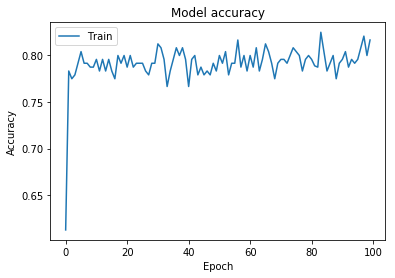

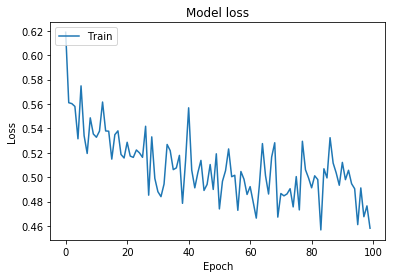

In [49]:
import matplotlib.pyplot as plt



# Plot training & validation accuracy values
plt.plot(results.history['acc'])
# plt.plot(results.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(results.history['loss'])
# plt.plot(results.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
from keras.preprocessing import image
import numpy as np

# LATER: Add the image net parsing here, then do for-loop
# 



# img_path = 'elephant.jpg'
# img = image.load_img(img_path, target_size=(224, 224)) # kil format based on pillow -> loads to certain size
# x = image.img_to_array(img)                            
# x = np.expand_dims(x, axis=0)                          # making a numpy array

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])
# Predicted: [(u'n02504013', u'Indian_elephant', 0.82658225), (u'n01871265', u'tusker', 0.1122357), (u'n02504458', u'African_elephant', 0.061040461)]

# Train a model to classify

In [38]:
pred = model.predict(x_train[1000:2000])

ValueError: Error when checking input: expected conv2d_49_input to have shape (224, 224, 1) but got array with shape (224, 224, 3)

In [ ]:
pred

In [ ]:
strs = ['n0' + str(int(x)) for x in label_encoder.inverse_transform(pred[0])]
outputs = [wnids_to_words[x] for x in strs]

In [ ]:
outputs

In [ ]:
pred

In [ ]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()